# Portfolio theory

In this notebook we empirically analyse the properties of the minimum global variance portfolion under the special case $\rho_{1,2}=1$

### Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parameters

In [221]:
np.random.seed(42)             # for replicability
n = 252 * 100                  # trading days
mu_a, sigma_a = 0.04, 0.2      # mean and std. dev. for asset A

# Simulate returns for stock A
r_a = np.random.normal(mu_a, sigma_a, n)

# Stock B perfectly correlated with A
alpha, beta = 0.01, 0.4
r_b = alpha + beta * r_a
sigma_b = np.std(r_b)

# Create DataFrame
df = pd.DataFrame({"A": r_a, "B": r_b})


### Plot the returns

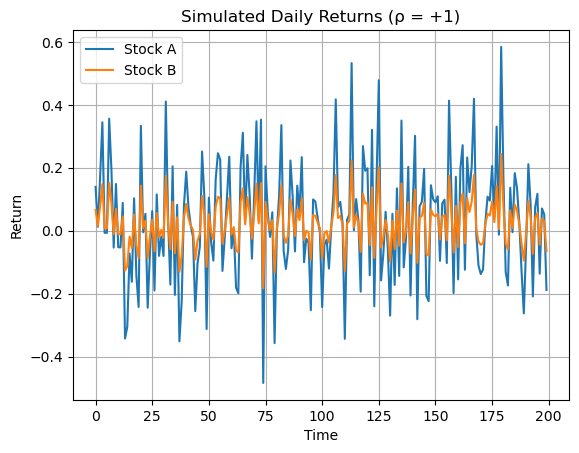

Returns:
 A    0.040045
B    0.026018
dtype: float64
Standard deviation:
 A    0.199569
B    0.079828
dtype: float64

Correlation matrix:
      A    B
A  1.0  1.0
B  1.0  1.0


In [222]:

# Plot time series
plt.plot(df["A"][:200], label="Stock A")
plt.plot(df["B"][:200], label="Stock B")
plt.title("Simulated Daily Returns (ρ = +1)")
plt.xlabel("Time")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

# Compute variances and correlation
print("Returns:\n", df.mean())
print("Standard deviation:\n", df.std(ddof=1))
print("\nCorrelation matrix:\n", df.corr())

### Compute GMV weights

$w_a = -\frac{\sigma_b}{\sigma_a -\sigma_b}$ and $w_b = \frac{\sigma_a}{\sigma_a - \sigma_b}$

In [223]:

w_a = - sigma_b / (sigma_a - sigma_b)
w_b = sigma_a / (sigma_a - sigma_b)

print("Portfolio weights: ",np.round(w_a,3)*100,"%", np.round(w_b*100,3),"%")



Portfolio weights:  -66.4 % 166.425 %


### Compute portfolio (expected) returns and volatility

In [224]:
Rp = w_a * r_a + w_b * r_b

sigmap = w_a**2 * sigma_a**2 + w_b**2 * sigma_b**2 + 2 * w_a * w_b * sigma_a * sigma_b

df = pd.DataFrame(index=['Expected return', 'Standard deviation'], columns=['A','B', 'P'])

df.iloc[0, :] = np.asarray([r_a.mean(), r_b.mean(), Rp.mean()])
df.iloc[1, :] = np.asarray([sigma_a, sigma_b, sigmap])

print(df)


                           A         B         P
Expected return     0.040045  0.026018  0.016701
Standard deviation       0.2  0.079826       0.0
